In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 512
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1000
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


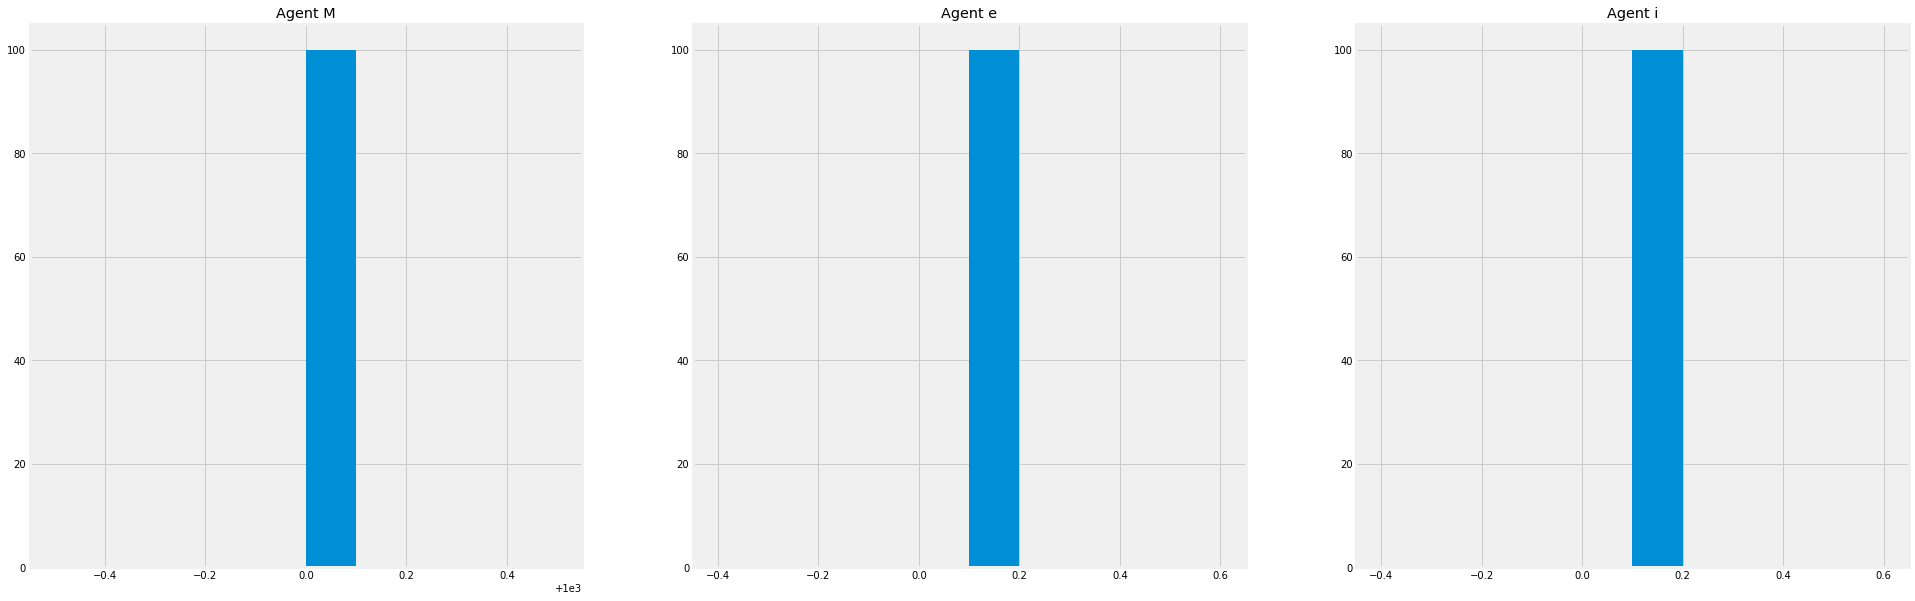

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 90.0, Temptation: 100.0, Sucker: -10.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 90.0, Temptation: 100.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 90.0, Temptation: 100.0, Sucker: -10.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 90.0, Temptation: 100.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 90.0, Temptation: 100.0, Sucker: -10.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 90.0, Temptation: 100.0, Su

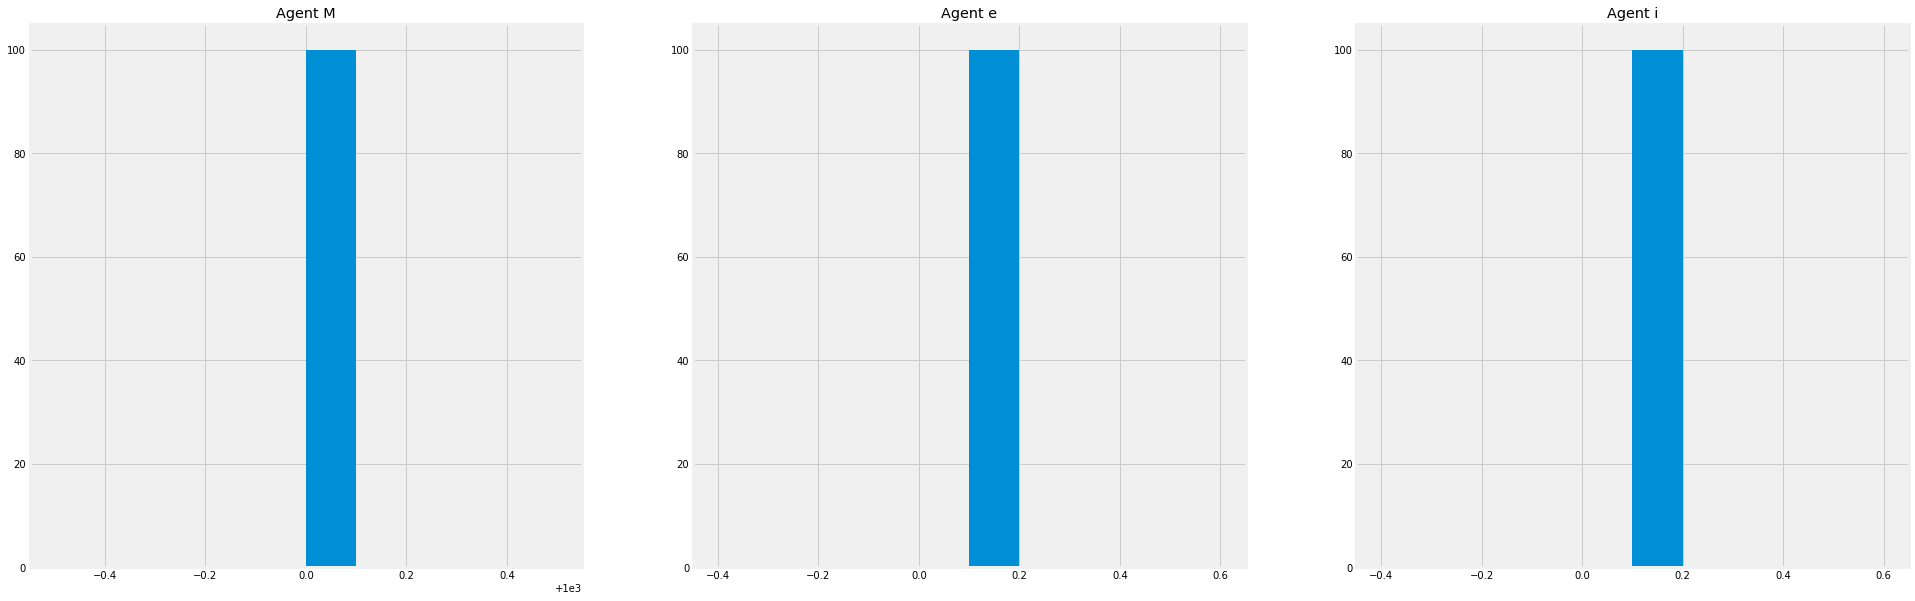

In [2]:
agents = get_agents(homogenous = True)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)
check_parameters(agents) #correct result because homogenous = True

Tournament has started...
Tournament has ended. The simulation took 16 minutes.
    S.D.  Counts
0    0.5     316
1    0.6     303
2    0.7     293
3    0.8     275
4    0.9     263
5    1.0     219
6    1.1     184
7    1.2     163
8    1.3     156
9    1.4     123
10   1.5     104
11   1.6      87
12   1.7      72
13   1.8      60
14   1.9      45
15   2.0      32
16   2.1      27
17   2.2      25
18   2.3      24
19   2.4      13
20   2.5      10
21   2.6       7
22   2.7       6
23   2.8       5
24   2.9       5
25   3.0       7


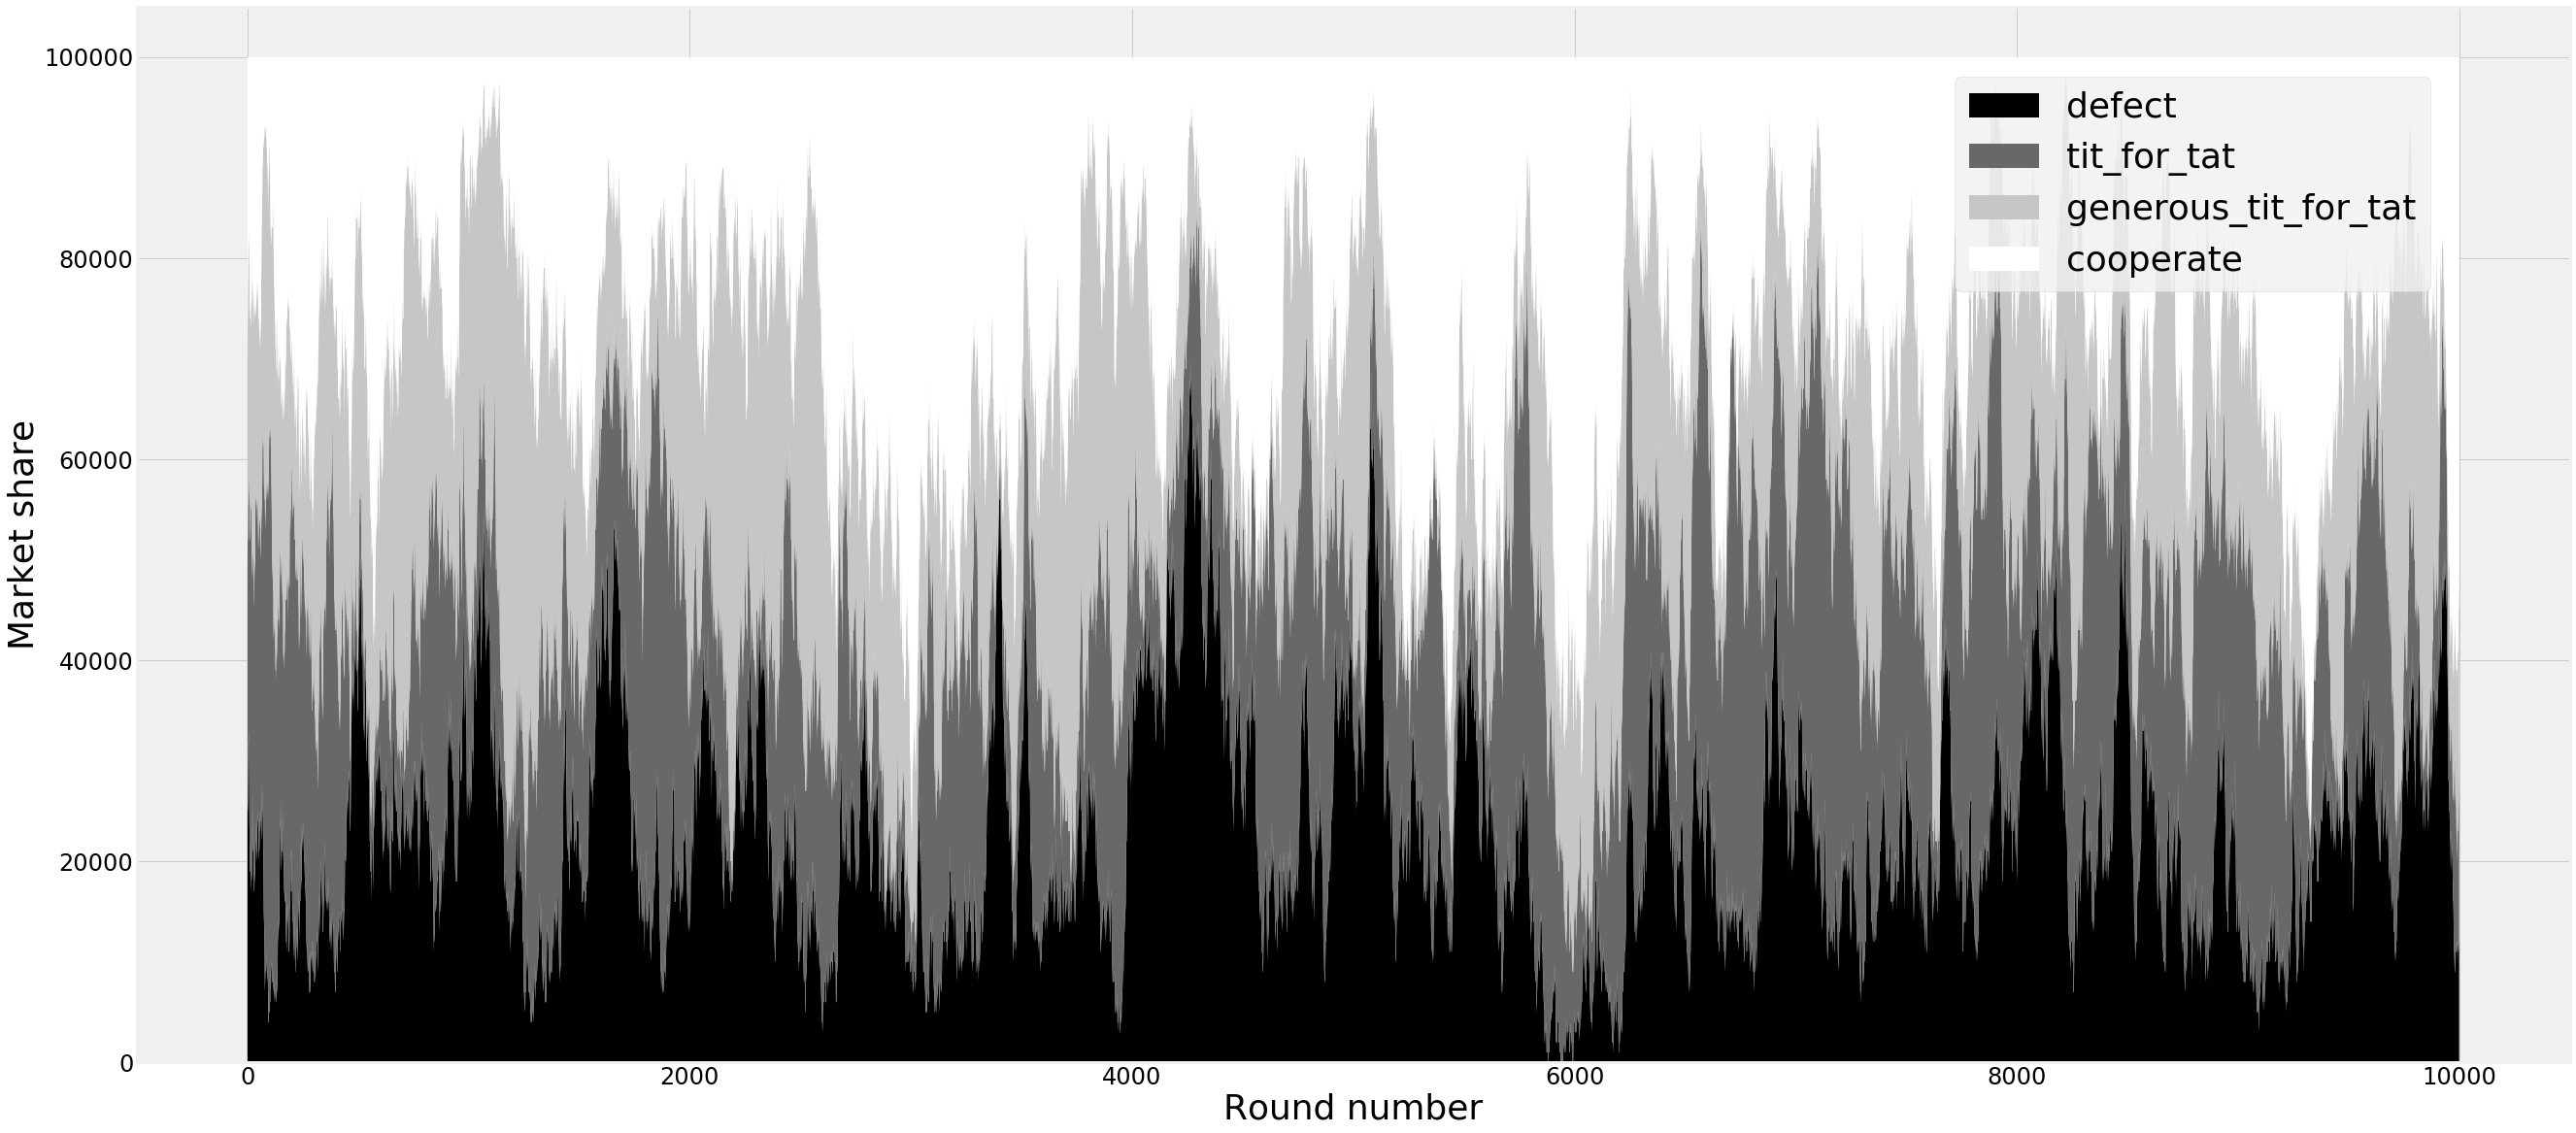

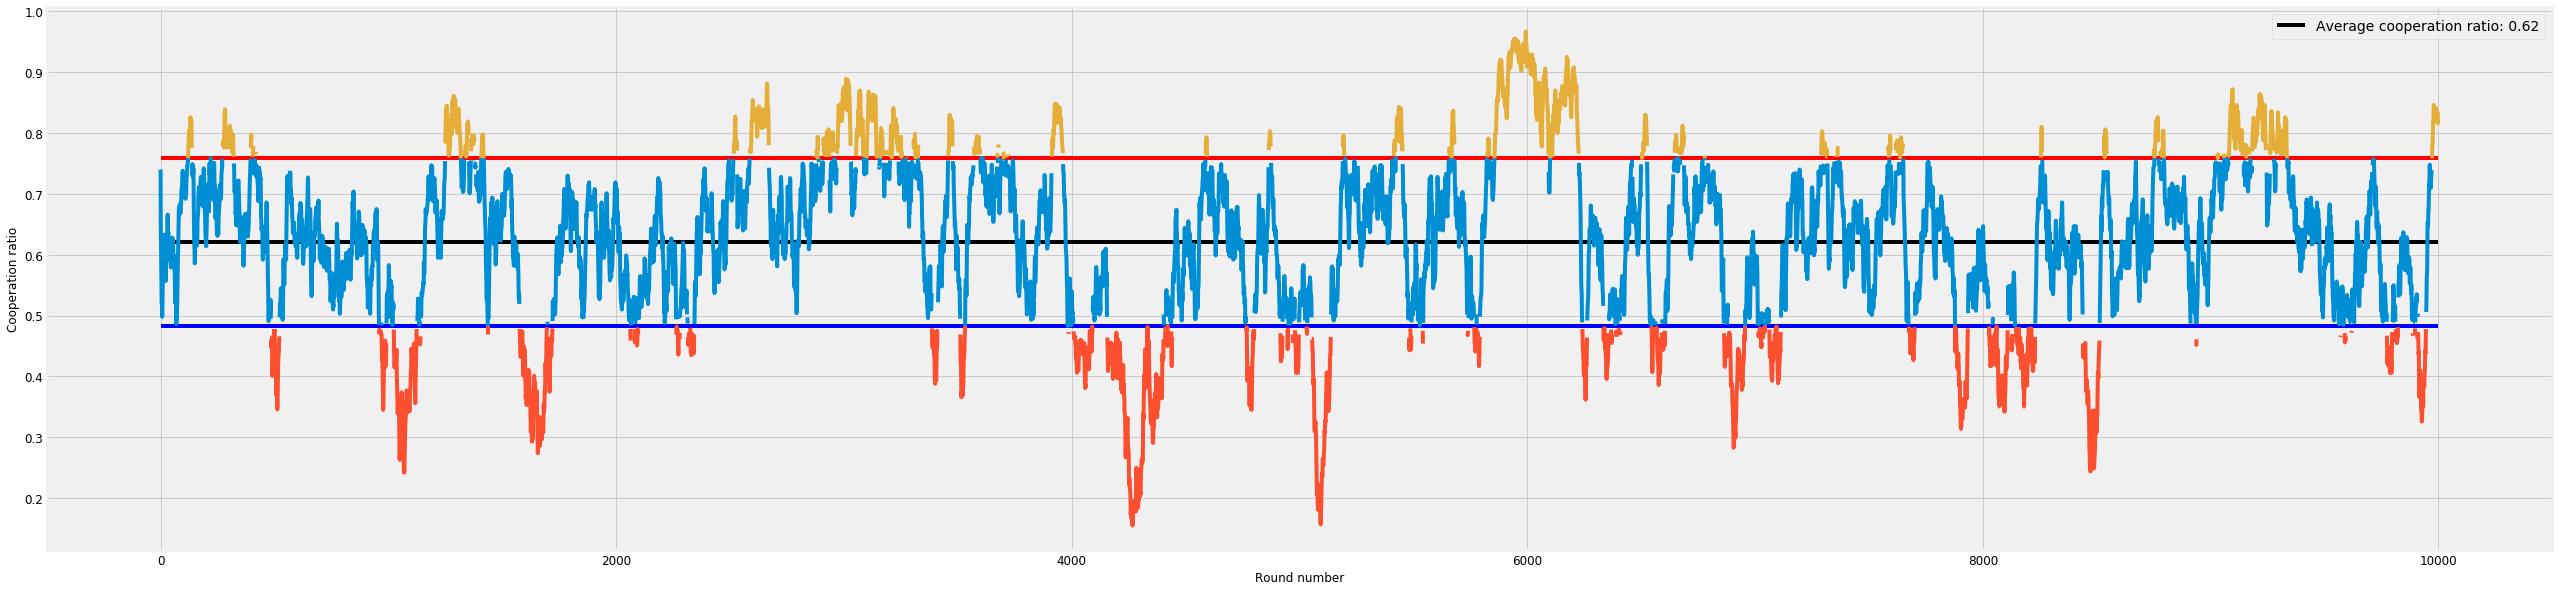

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "control_group", seed = str(seed))